<a href="https://colab.research.google.com/github/PedroC-dev/RelatorioAtividadesPDI/blob/main/fundamentos_ex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TIFF (512, 512) L


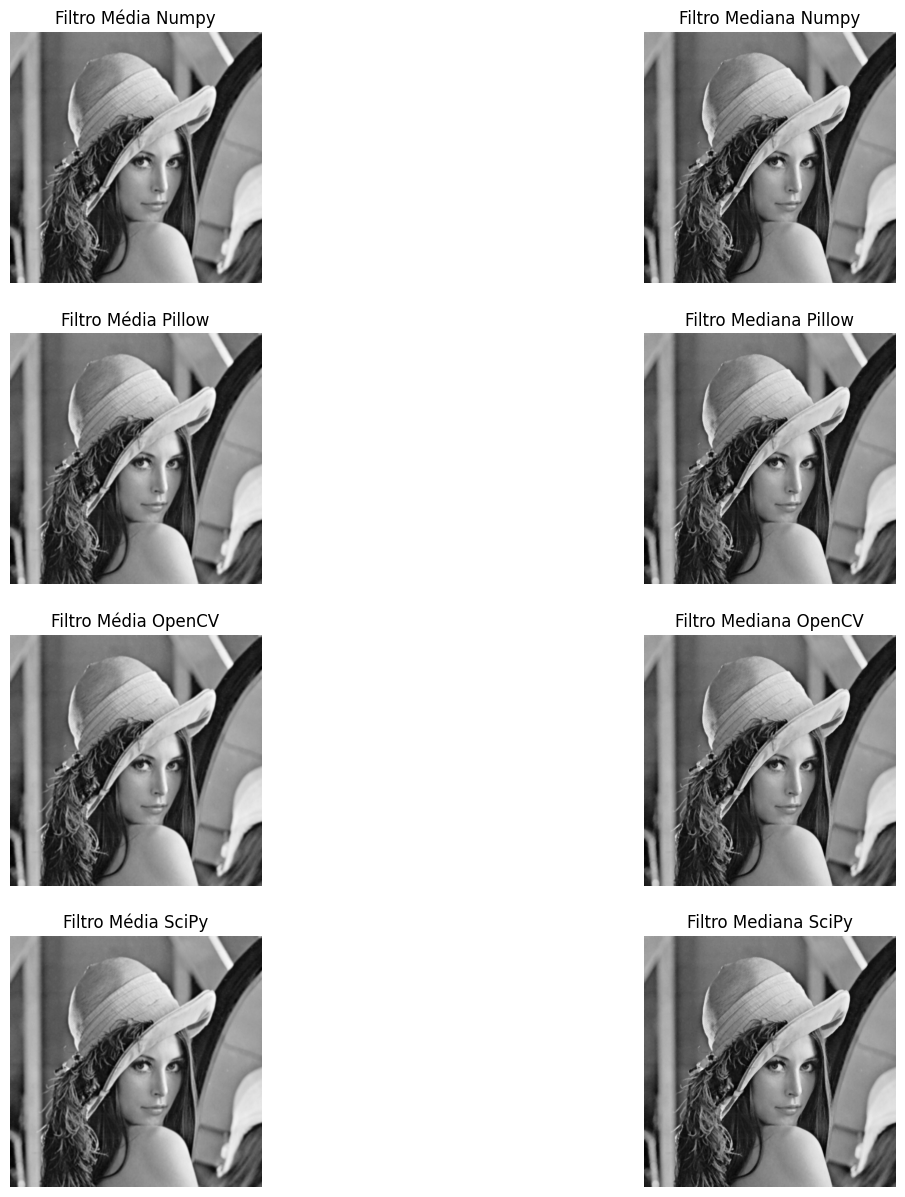

TIFF (512, 512) L


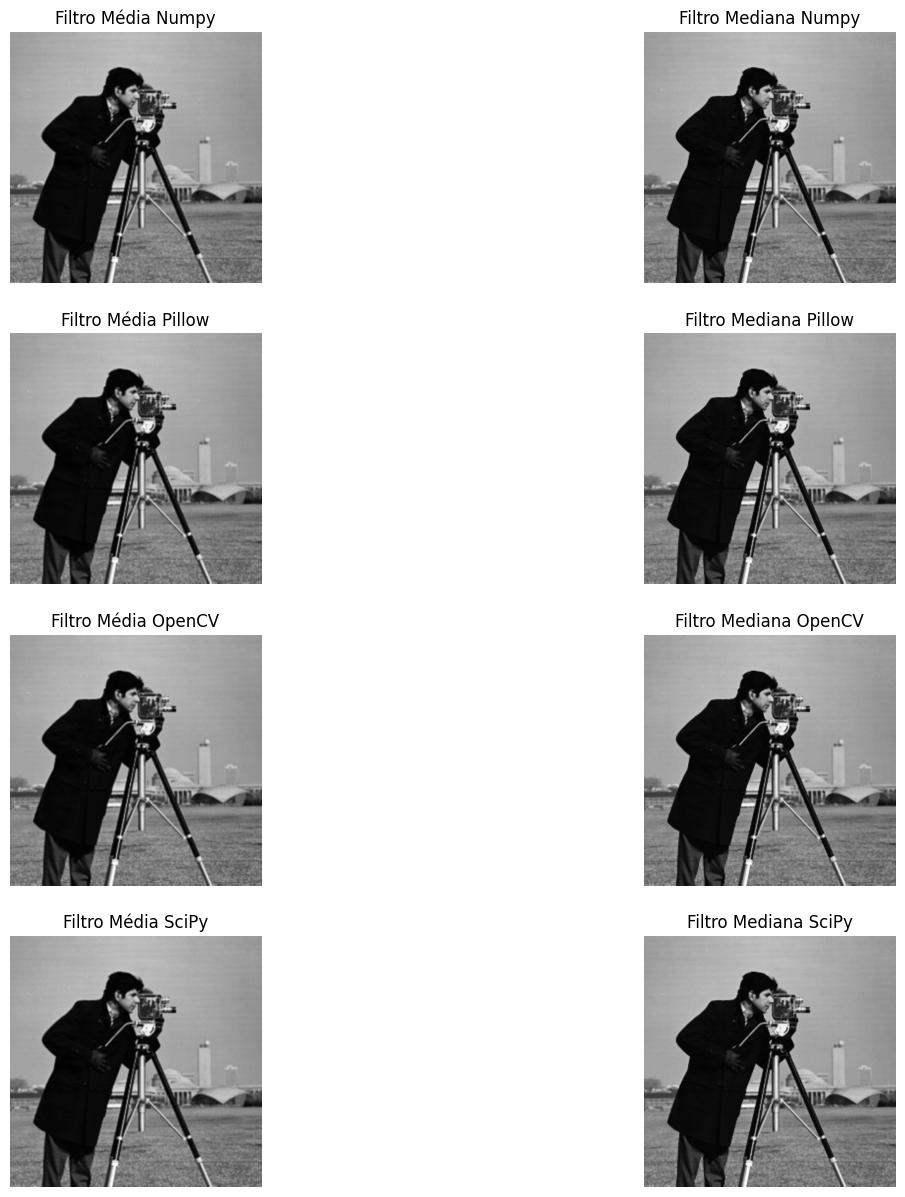

TIFF (600, 600) L


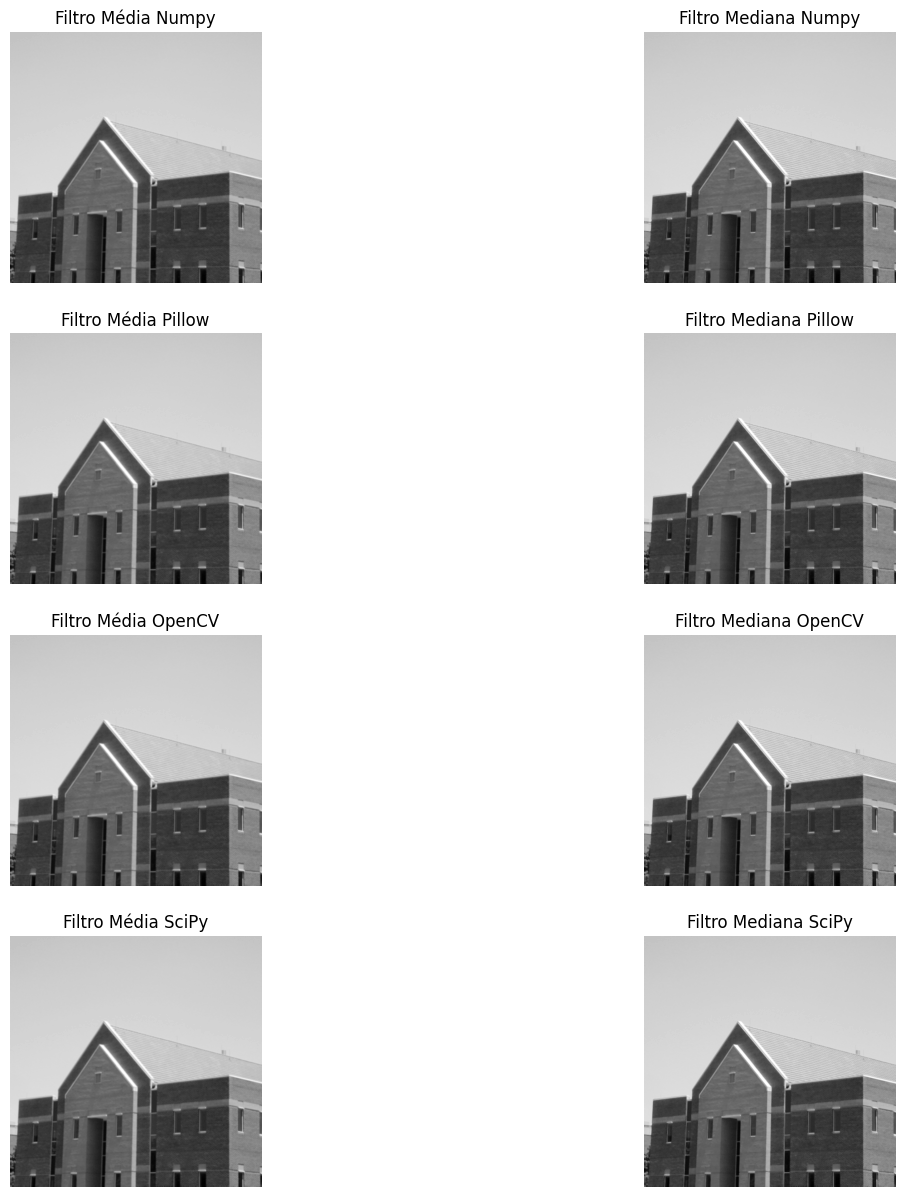

In [3]:
import numpy as np
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
import cv2
from scipy import ndimage

# Funções Exercicio 2

# Filtros Média
def media_numpy(img):
    npImg = np.array(img)
    altura, largura = npImg.shape
    nova_imagem = np.zeros((altura-2, largura-2), dtype=np.uint8)
    for i in range(1, altura-1):
        for j in range(1, largura-1):
            vizinhanca = npImg[i-1:i+2, j-1:j+2]
            nova_imagem[i-1, j-1] = np.mean(vizinhanca)
    return Image.fromarray(nova_imagem)

def media_pillow(img):
    img_pil = Image.fromarray(np.array(img))
    return img_pil.filter(ImageFilter.BoxBlur(1))

def media_opencv(img):
    npImg = np.array(img)
    imagem_cv2 = cv2.cvtColor(npImg, cv2.COLOR_GRAY2BGR)
    blur = cv2.blur(imagem_cv2, (3, 3))
    return Image.fromarray(cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY))

def media_scipy(img):
    npImg = np.array(img)
    return Image.fromarray(ndimage.uniform_filter(npImg, size=3))

# Filtros Mediana
def mediana_numpy(img):
    npImg = np.array(img)
    altura, largura = npImg.shape
    nova_imagem = np.zeros((altura-2, largura-2), dtype=np.uint8)
    for i in range(1, altura-1):
        for j in range(1, largura-1):
            vizinhanca = npImg[i-1:i+2, j-1:j+2]
            nova_imagem[i-1, j-1] = np.median(vizinhanca)
    return Image.fromarray(nova_imagem)

def mediana_pillow(img):
    img_pil = Image.fromarray(np.array(img))
    return img_pil.filter(ImageFilter.MedianFilter(3))

def mediana_opencv(img):
    npImg = np.array(img)
    imagem_cv2 = cv2.cvtColor(npImg, cv2.COLOR_GRAY2BGR)
    median = cv2.medianBlur(imagem_cv2, 3)
    return Image.fromarray(cv2.cvtColor(median, cv2.COLOR_BGR2GRAY))

def mediana_scipy(img):
    npImg = np.array(img)
    return Image.fromarray(ndimage.median_filter(npImg, size=3))

# Função principal
def main():
    imagens = ['lena_gray_512.tif', 'cameraman.tif', 'house.tif']
    for img_path in imagens:
        img = Image.open(img_path)
        print(img.format, img.size, img.mode)

        # Aplicação dos filtros
        imgMediaNumpy = media_numpy(img)
        imgMediaPillow = media_pillow(img)
        imgMediaOpenCV = media_opencv(img)
        imgMediaScipy = media_scipy(img)
        imgMedianaNumpy = mediana_numpy(img)
        imgMedianaPillow = mediana_pillow(img)
        imgMedianaOpenCV = mediana_opencv(img)
        imgMedianaScipy = mediana_scipy(img)

        # Plotagem dos resultados
        fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))
        ax[0, 0].imshow(imgMediaNumpy, cmap='gray')
        ax[0, 0].set_title("Filtro Média Numpy")
        ax[0, 0].axis('off')

        ax[0, 1].imshow(imgMedianaNumpy, cmap='gray')
        ax[0, 1].set_title("Filtro Mediana Numpy")
        ax[0, 1].axis('off')

        ax[1, 0].imshow(imgMediaPillow, cmap='gray')
        ax[1, 0].set_title("Filtro Média Pillow")
        ax[1, 0].axis('off')

        ax[1, 1].imshow(imgMedianaPillow, cmap='gray')
        ax[1, 1].set_title("Filtro Mediana Pillow")
        ax[1, 1].axis('off')

        ax[2, 0].imshow(imgMediaOpenCV, cmap='gray')
        ax[2, 0].set_title("Filtro Média OpenCV")
        ax[2, 0].axis('off')

        ax[2, 1].imshow(imgMedianaOpenCV, cmap='gray')
        ax[2, 1].set_title("Filtro Mediana OpenCV")
        ax[2, 1].axis('off')

        ax[3, 0].imshow(imgMediaScipy, cmap='gray')
        ax[3, 0].set_title("Filtro Média SciPy")
        ax[3, 0].axis('off')

        ax[3, 1].imshow(imgMedianaScipy, cmap='gray')
        ax[3, 1].set_title("Filtro Mediana SciPy")
        ax[3, 1].axis('off')

        plt.show()

if __name__ == "__main__":
    main()
